In [42]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sp.var('x1 x2')

(x1, x2)

In [4]:
f = sp.cos(x1 - sp.exp(x2) + 2) * sp.sin(x1**2 / 4 - x2**2 / 3 + 4)

In [16]:
dx1 = sp.utilities.lambdify((x1, x2), f.diff(x1))

In [17]:
dx2 = sp.utilities.lambdify((x1, x2), f.diff(x2))

In [18]:
def gradient(x):
  return np.array([
    dx1(*x),
    dx2(*x),
  ])

In [19]:
gradient([1, 1])

array([-0.1485638 , -0.07134325])

In [20]:
def test(a, b):
  print(a, b)

In [21]:
test(1, 2)

1 2


In [24]:
t = [3, 4]
test(*t)
test(t[0], t[1])

3 4
3 4


In [35]:
x0 = np.array([1, 1])
T = 1e-8
dx = 2 * T
x_k = x0
x_km1 = 0.9 * x0 - 0.1
g_km1 = gradient(x_km1)
x = [x0]

In [36]:
while dx > T:
  g_k = gradient(x_k)
  dg_k = g_k - g_km1
  dx_k = x_k - x_km1
  alpha_k = np.abs(np.dot(dx_k, dg_k) / np.dot(dg_k, dg_k))
  x_km1 = x_k
  x_k = x_k - alpha_k * g_k
  x.append(x_k)
  g_km1 = g_k
  dx = np.linalg.norm(x_k - x_km1)

In [37]:
x_k

array([4.7337411 , 2.29004011])

In [40]:
x = np.array(x)
x

array([[1.        , 1.        ],
       [1.01620266, 1.00778083],
       [1.13309525, 1.05628044],
       [1.66757404, 1.21607054],
       [1.69527017, 1.31170653],
       [1.73190476, 1.2708757 ],
       [1.75136351, 1.2798441 ],
       [1.77867129, 1.28912344],
       [4.169466  , 2.08701498],
       [4.16843492, 2.72808886],
       [4.32563936, 2.45474413],
       [4.26307545, 2.24825794],
       [4.35087596, 2.17121628],
       [4.36006422, 2.23639291],
       [4.38189705, 2.23525752],
       [4.41140131, 2.2410884 ],
       [4.76103414, 2.29645838],
       [4.73756702, 2.22789855],
       [4.72876033, 2.28955607],
       [4.7290635 , 2.2893389 ],
       [4.72928404, 2.28940999],
       [4.72977237, 2.28947494],
       [4.73361113, 2.29007171],
       [4.73386494, 2.28910163],
       [4.73373231, 2.29003937],
       [4.73373279, 2.29003893],
       [4.73373318, 2.29003899],
       [4.73374109, 2.29004011],
       [4.7337411 , 2.29004012],
       [4.7337411 , 2.29004011]])

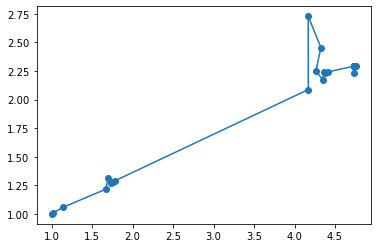

In [50]:
plt.plot(x[:,0], x[:,1], '-o')

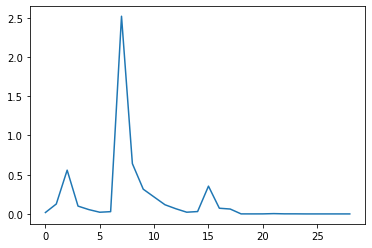

In [48]:
plt.plot(np.linalg.norm(np.diff(x, axis=0), axis=1))